

# ICS 435 Homework 4: Kyler Okuma

# References Used 


* https://www.tensorflow.org/tutorials/images/cnn
* https://machinelearningmastery.com/loss-functions-in-tensorflow/

# Imports 

In [118]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Data Preprocessing

In [120]:
# Load the FashionMNIST dataset using tensorflow.keras.datasets (for TensorFlow).
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the images to the range [0,1] and reshape them if necessary.
max = 255.0
X_train = X_train / max
X_test = X_test / max

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Split the dataset into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Part 2: Building the CNN Model

In [122]:
# You can try different CNN architectures (depth, kernel size) yourself
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # Base layer 
model.add(layers.MaxPooling2D((2, 2)))                                          
model.add(layers.Conv2D(64, (4, 4), activation='relu')) # Increase depth to 64 and kernel size to 4x4                       
model.add(layers.MaxPooling2D((2, 2)))                                            
model.add(layers.Conv2D(128, (5, 5), activation='relu')) # Increase depth to 128 and kernel size to 5x5                            

model.add(layers.Flatten())                           
model.add(layers.Dense(128, activation='relu'))      
model.add(layers.Dense(10, activation='softmax'))      

model.summary()

model.compile(optimizer='adam',              
              loss='sparse_categorical_crossentropy', # Sparse categorical cross entropy loss function 
              metrics=['accuracy'])   

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 10, 10, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 1, 1, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 255,882 (999.54 KB)

 Trainable params: 255,882 (999.54 KB)

 Non-trainable params: 0 (0.00 B)

# Part 3: Training & Evaluation

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7585 - loss: 0.6622 - val_accuracy: 0.8723 - val_loss: 0.3453
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.8859 - loss: 0.3050 - val_accuracy: 0.8944 - val_loss: 0.2813
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9081 - loss: 0.2489 - val_accuracy: 0.9056 - val_loss: 0.2652
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9187 - loss: 0.2195 - val_accuracy: 0.9154 - val_loss: 0.2357
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9286 - loss: 0.1887 - val_accuracy: 0.9122 - val_loss: 0.2382
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9392 - loss: 0.1620 - val_accuracy: 0.9122 - val_loss: 0.2494
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9481 - loss: 0.1401 - val_accuracy: 0.9118 - val_loss: 0.2390
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9537 -

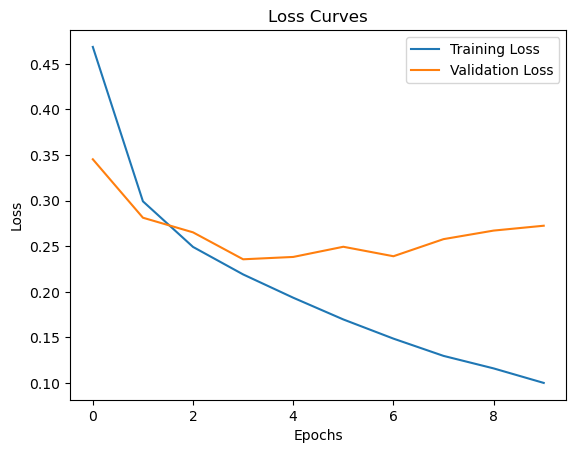

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9090 - loss: 0.3034
Test Accuracy: 90.91%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


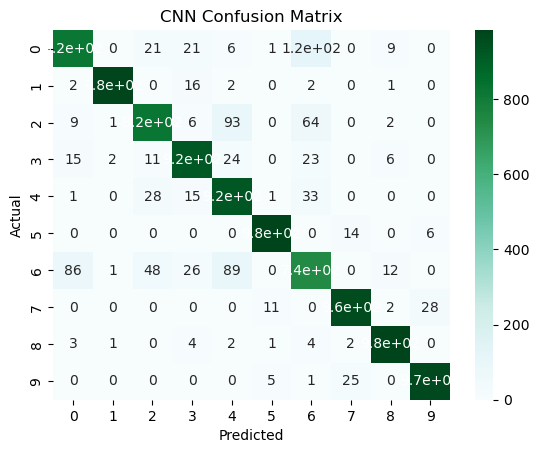

In [124]:
# Train the model
history = model.fit(X_train, y_train, epochs=10,  
                    validation_data=(X_val, y_val))

# Plot loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Compute test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate a confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, cmap='BuGn', xticklabels=range(10), yticklabels=range(10))
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Part 4: Experimentation & Improvements 

In [ ]:
# Try at least two modifications (e.g., adding more layers, changing filter size, adding dropout, batch normalization, or data augmentation).
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # Base layer 
model2.add(layers.MaxPooling2D((2, 2)))                                          
model2.add(layers.Conv2D(64, (4, 4), activation='relu')) # Increase depth to 64 and kernel size to 4x4                       
model2.add(layers.MaxPooling2D((2, 2)))                                            
model2.add(layers.Conv2D(128, (5, 5), activation='relu')) # Increase depth to 128 and kernel size to 5x5                            

model2.add(layers.Flatten())                           
model2.add(layers.Dense(128, activation='relu'))      
model2.add(Dropout(0.5)) # Add dropout 
model2.add(layers.Dense(10, activation='softmax'))      

model2.summary()

model2.compile(optimizer='adam',              
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy']) 

history = model2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f"Test Accuracy (With Dropout): {test_accuracy * 100:.2f}%")

model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # Base layer 
model3.add(BatchNormalization()) # Batch normalization
model3.add(layers.MaxPooling2D((2, 2)))                                          
model3.add(layers.Conv2D(64, (4, 4), activation='relu')) # Increase depth to 64 and kernel size to 4x4 
model3.add(BatchNormalization()) # Batch normalization
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(BatchNormalization()) # Batch normalization
model3.add(layers.Conv2D(128, (5, 5), activation='relu')) # Increase depth to 128 and kernel size to 5x5                            

model3.add(layers.Flatten())                           
model3.add(layers.Dense(128, activation='relu'))      
model3.add(BatchNormalization()) # Batch normalization
model3.add(layers.Dense(10, activation='softmax'))      

model3.summary()

model3.compile(optimizer='adam',              
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy']) 

history = model3.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

test_loss, test_accuracy = model3.evaluate(X_test, y_test)
print(f"Test Accuracy (With Batch Normalization): {test_accuracy * 100:.2f}%")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 10, 10, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 1, 1, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 255,882 (999.54 KB)

 Trainable params: 255,882 (999.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.7149 - loss: 0.8019 - val_accuracy: 0.8671 - val_loss: 0.3583
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.8747 - loss: 0.3505 - val_accuracy: 0.8930 - val_loss: 0.2908
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9008 - loss: 0.2790 - val_accuracy: 0.9032 - val_loss: 0.2621
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9083 - loss: 0.2523 - val_accuracy: 0.8932 - val_loss: 0.3037
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9194 - loss: 0.2213 - val_accuracy: 0.9078 - val_loss: 0.2552
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.9285 - loss: 0.1985 - val_accuracy: 0.9130 - val_loss: 0.2545
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9348 - loss: 0.1735 - val_accuracy: 0.9077 - val_loss: 0.2649
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9398 -

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 10, 10, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 1, 1, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,034 (1004.04 KB)

 Trainable params: 256,458 (1001.79 KB)

 Non-trainable params: 576 (2.25 KB)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.8240 - loss: 0.4971 - val_accuracy: 0.8954 - val_loss: 0.2803
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 48ms/step - accuracy: 0.9022 - loss: 0.2666 - val_accuracy: 0.9009 - val_loss: 0.2706
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 74s 50ms/step - accuracy: 0.9192 - loss: 0.2225 - val_accuracy: 0.9046 - val_loss: 0.2651
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 48ms/step - accuracy: 0.9288 - loss: 0.1927 - val_accuracy: 0.9121 - val_loss: 0.2478
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 52ms/step - accuracy: 0.9426 - loss: 0.1561 - val_accuracy: 0.9162 - val_loss: 0.2355
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 75s 50ms/step - accuracy: 0.9504 - loss: 0.1358 - val_accuracy: 0.9151 - val_loss: 0.2485
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 74s 49ms/step - accuracy: 0.9565 - loss: 0.1184 - val_accuracy: 0.9160 - val_loss: 0.2604
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 51ms/step - accuracy: 0.9637 -